___

# Binary Classification 


Typically, binary classification tasks involve one class that is the normal state and another class that is the abnormal state.

For example In this project we will be working with a fake advertising data set, indicating whether a particular internet user clicked on an Advertisement (1) or not (0). We will try to create a model that will predict whether or not they will click on an ad based off the features of that user


Popular algorithms that can be used for binary classification include:

* Logistic Regression
* k-Nearest Neighbors
* Decision Trees
* Support Vector Machine
* Random Forest Classifier

Some algorithms are specifically designed for binary classification and do not natively support more than two classes; examples include Logistic Regression and Support Vector Machines.

But in This Project we will use :
* Logistic Regression
* k-Nearest Neighbors
* Random Forest Classifier

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [ ]:
data=pd.read_csv('/kaggle/input/advertisement-click-on-ad/advertising.csv')

**Check the head of ad_data**

In [ ]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [ ]:
data.describe(include='O')

,Ad Topic Line,City,Country,Timestamp
count,1000,1000,1000,1000
unique,1000,969,237,1000
top,Cloned 5thgeneration orchestration,Lisamouth,France,2016-03-27 00:53:11
freq,1,3,9,1


In [ ]:
data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
numrical_col=data[['Daily Time Spent on Site',	'Age',	'Area Income',	'Daily Internet Usage',	'Male',	'Clicked on Ad']]

array([[<Axes: title={'center': 'Daily Time Spent on Site'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Area Income'}>,
        <Axes: title={'center': 'Daily Internet Usage'}>],
       [<Axes: title={'center': 'Male'}>,
        <Axes: title={'center': 'Clicked on Ad'}>]], dtype=object)

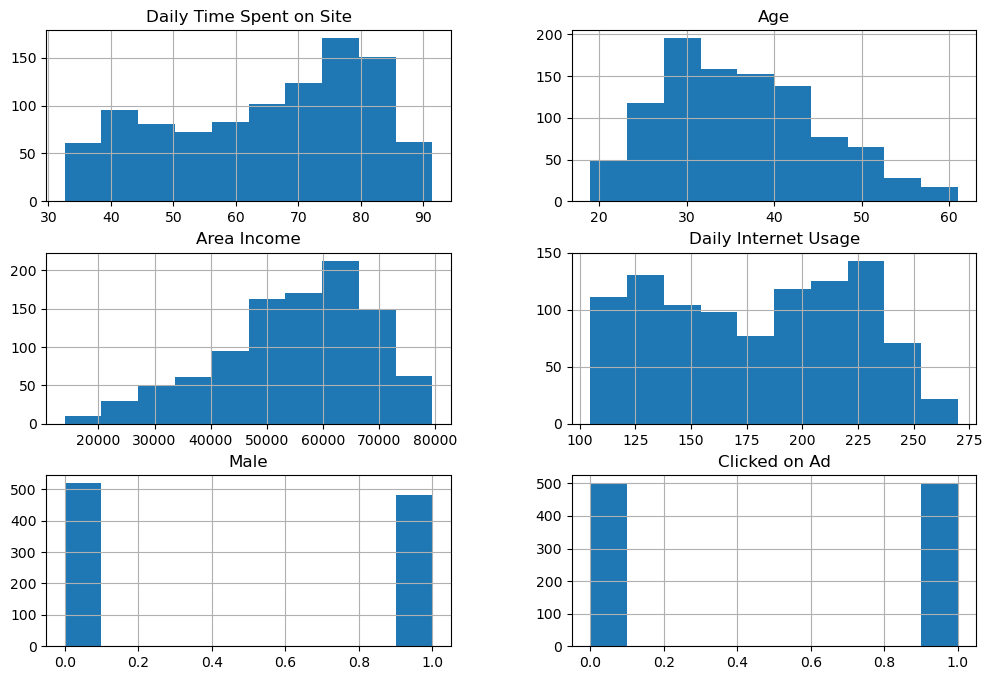

In [ ]:
numrical_col.hist(figsize=(12,8))

# Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

**Create a histogram of the Age**

<Axes: xlabel='Age', ylabel='Count'>

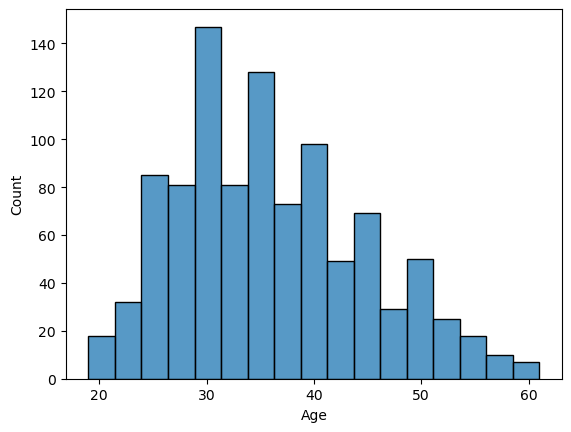

In [ ]:
sns.histplot(data=data,x='Age')

**Create a jointplot showing Area Income versus Age.**

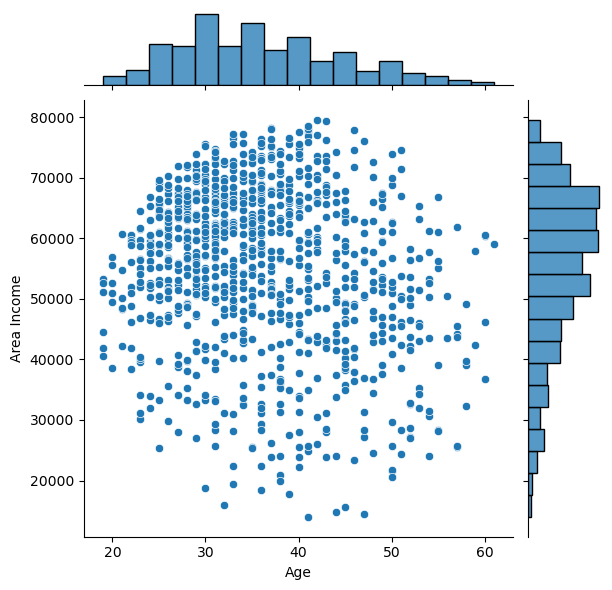

In [ ]:
sns.jointplot(data=data,x='Age',y='Area Income')

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

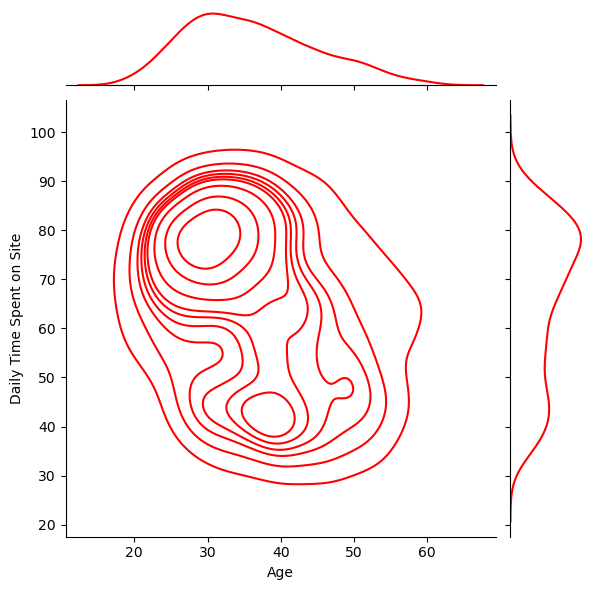

In [ ]:
sns.jointplot(data=data,x='Age',y='Daily Time Spent on Site',kind='kde',color='r')

**Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

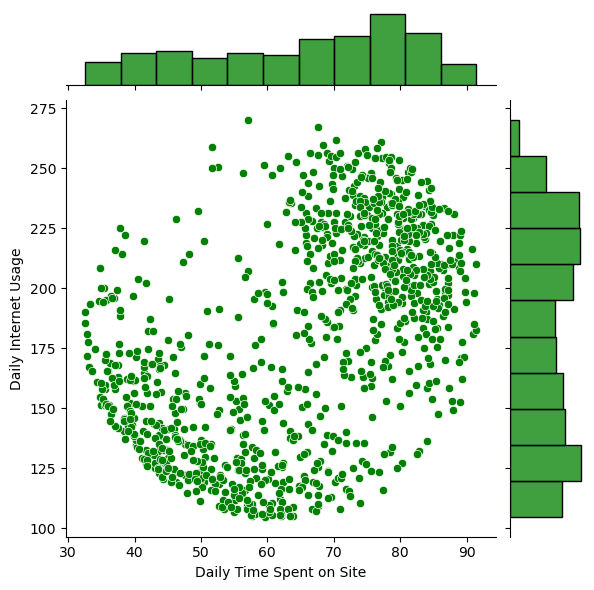

In [ ]:
sns.jointplot(data=data,y='Daily Internet Usage',x='Daily Time Spent on Site',color='g')

**Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

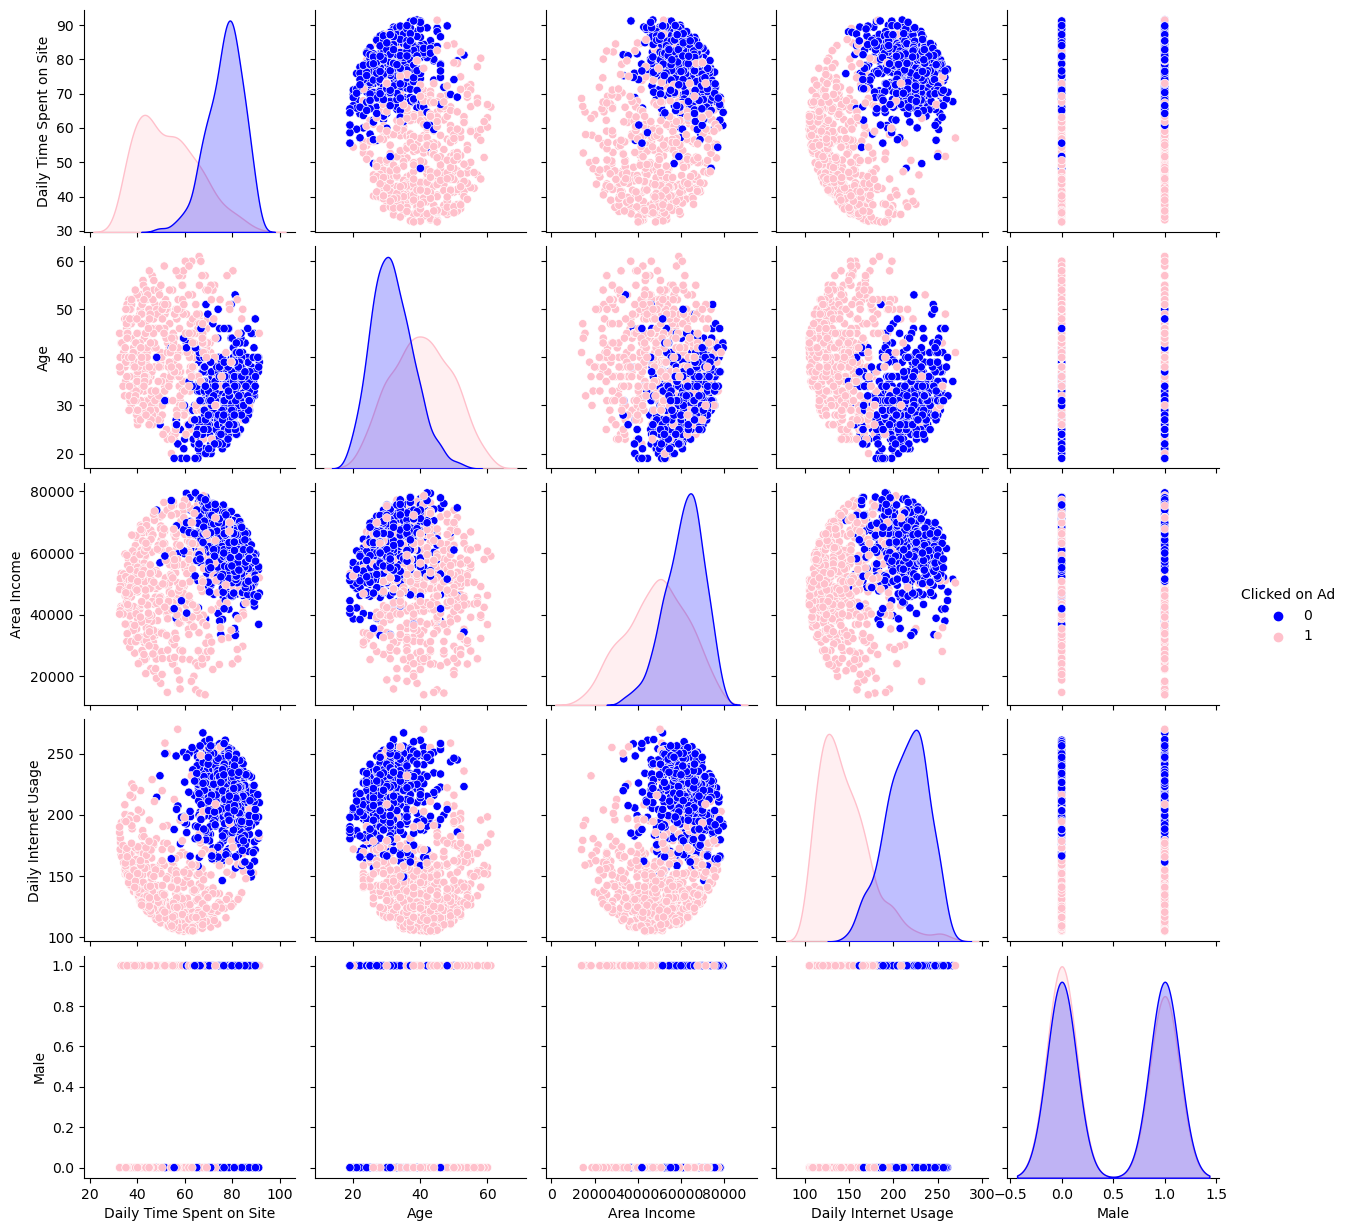

In [ ]:
sns.pairplot(data=data,hue='Clicked on Ad',palette=['blue','pink'])

/tmp/ipykernel_20/2653413889.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,cmap='Blues')


<Axes: >

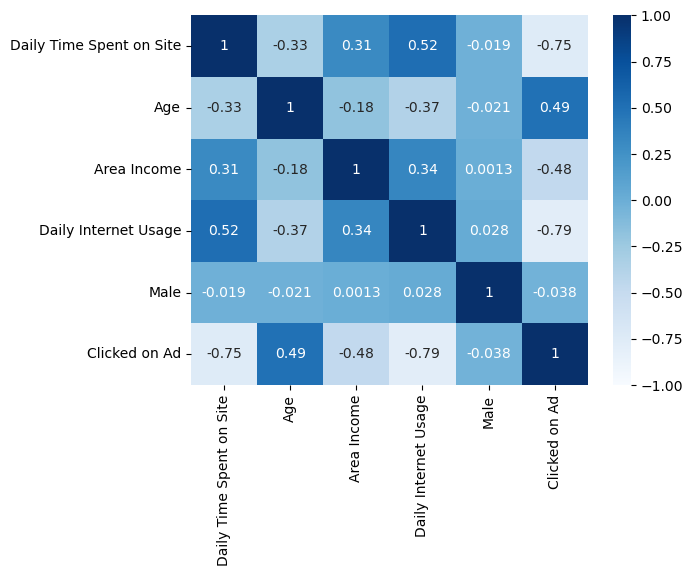

In [ ]:
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,cmap='Blues')

# Feature Engineering

**Split the data into training set and testing set using train_test_split**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
x=numrical_col.drop('Clicked on Ad',axis=1)
y=data[['Clicked on Ad']]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
ms=MinMaxScaler()
xtrain=pd.DataFrame(ms.fit_transform(x_train),columns=x_train.columns,index=x_train.index)
xtest=pd.DataFrame(ms.fit_transform(x_test),columns=x_test.columns,index=x_test.index)

# Logistic Regression

Logisitc Regression is commonly used to estimate the probability that an instance belongs to a particular class. If the estimated probability that an instance is greater than 50%, then the model predicts that the instance belongs to that class 1, or else it predicts that it does not. This makes it a binary classifier. In this notebook we will look at the theory behind Logistic Regression and use it to indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

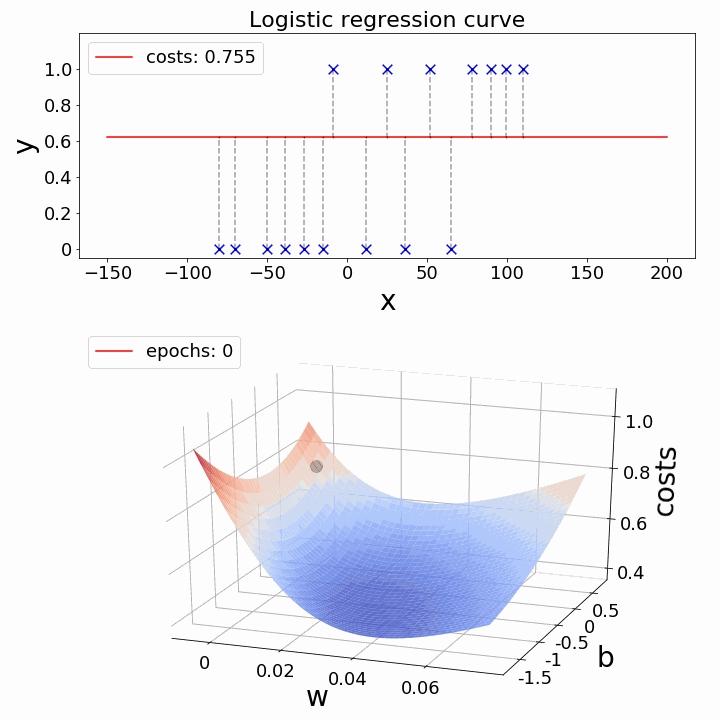

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

**Train and fit a logistic regression model on the training set.**

In [ ]:
log_reg=LogisticRegression()

logistic regression hyperparameters tuning

https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

In [ ]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
grid_search = GridSearchCV(estimator=log_reg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [ ]:
grid_result = grid_search.fit(xtrain, y_train.values.ravel())
best_params = grid_result.best_params_
best_score = grid_result.best_score_
print(f"Best: {best_score} using {best_params}" )

Best: 0.9741666666666667 using {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
log_reg=LogisticRegression(**best_params)
log_reg.fit(xtrain, y_train.values.ravel())

LogisticRegression(solver='newton-cg')

# Predictions and Evaluations
We can evaluate a binary classifier based on the following parameters:

True Positive (TP): The patient is diseased and the model predicts "diseased"
False Positive (FP): The patient is healthy but the model predicts "diseased"
True Negative (TN): The patient is healthy and the model predicts "healthy"
False Negative (FN): The patient is diseased and the model predicts "healthy"
After obtaining these values, we can compute the accuracy score of the binary classifier as follows:

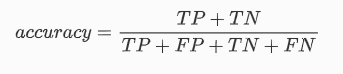

The following is a confusion matrix, which represents the above parameters:

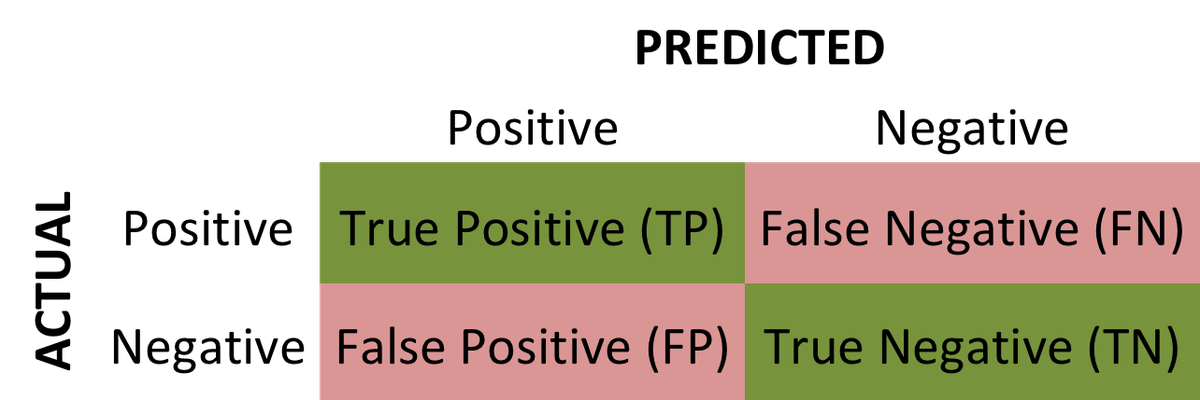

In [ ]:
pred=pd.DataFrame(log_reg.predict(xtest),columns=y_test.columns,index=y_test.index)


,Clicked on Ad
521,1
737,1
740,1
660,1
411,0
...,...
408,1
332,1
208,1
613,0


**Create a Confusion Matrix for the model.**

In [ ]:
metrics.confusion_matrix(pred,y_test)

array([[ 86,   8],
       [  3, 103]])

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        89
           1       0.97      0.93      0.95       111

    accuracy                           0.94       200
   macro avg       0.94      0.95      0.94       200
weighted avg       0.95      0.94      0.95       200



In [ ]:
print(f'accuracy = {metrics.accuracy_score(y_test,pred)*100} %')

accuracy = 94.5 %


In [ ]:
print(f'accuracy = {metrics.recall_score(y_test,pred)*100} %')

accuracy = 92.7927927927928 %


In [ ]:
print(f'accuracy = {metrics.precision_score(y_test,pred)*100} %')

accuracy = 97.16981132075472 %


# k-Nearest Neighbors


K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.
K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.
K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.
It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.
KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.


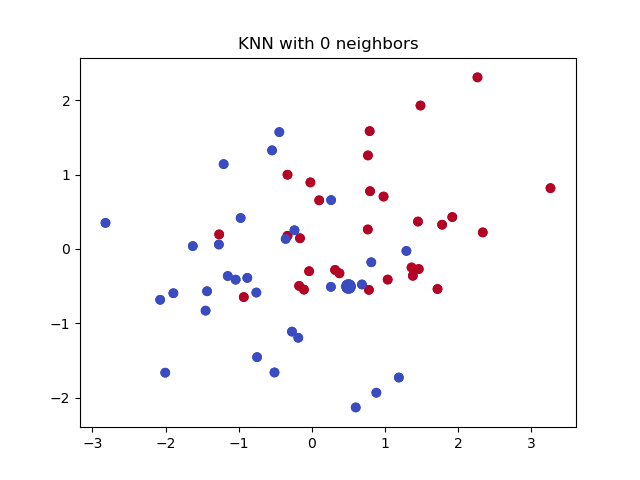

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(xtrain,y_train.values.ravel())

KNeighborsClassifier()

In [ ]:
pred=pd.DataFrame(knn.predict(xtest),columns=y_test.columns,index=y_test.index)

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        89
           1       0.96      0.91      0.94       111

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



In [ ]:
print(f'accuracy = {metrics.accuracy_score(y_test,pred)*100} %')

accuracy = 93.0 %


In [ ]:
print(f'accuracy = {metrics.recall_score(y_test,pred)*100} %')

accuracy = 90.990990990991 %


In [ ]:
print(f'accuracy = {metrics.precision_score(y_test,pred)*100} %')

accuracy = 96.19047619047619 %


# Random Forest Classifier

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

In [ ]:
rfc=RandomForestClassifier()

In [ ]:
rfc.fit(xtrain,y_train.values.ravel())

RandomForestClassifier()

In [ ]:
pred=pd.DataFrame(rfc.predict(xtest),columns=y_test.columns,index=y_test.index)

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92        89
           1       0.94      0.93      0.93       111

    accuracy                           0.93       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.93      0.93      0.93       200



In [ ]:
print(f'accuracy = {metrics.accuracy_score(y_test,pred)*100} %')

accuracy = 92.5 %


In [ ]:
print(f'accuracy = {metrics.recall_score(y_test,pred)*100} %')

accuracy = 92.7927927927928 %


In [ ]:
print(f'accuracy = {metrics.precision_score(y_test,pred)*100} %')

accuracy = 93.63636363636364 %
